In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [5]:
path = '/home/kpierce/Desktop/reverting-onecell/data/'
files = [f for f in os.listdir(path) if f.endswith('.npy')]
data = [np.load(path+f).item() for f in files]
for d in data: # add in a flow attribute
    d['flow'] = d['filename'].split('/')[-1].split('-')[0].split('_')[1]
# colors for plotting
colors = {'a':'red','g':'magenta', 'i':'green','l':'orange','n':'blue'}
for d in data:
    d['color']= colors[d['flow']]
a = 0.3 # particle radius 
dx = 22.5 # control volume cell size 
phi = 0.6 # packing fraction 
n0 = 21 #initial number of moving particles 
m0 = 50000 # initial number of stationary particles 
z1 = np.pi*a**2/(phi*dx) # relevant length scale of bed elevations

ValueError: can only convert an array of size 1 to a Python scalar

In [ ]:
lvals = [d['l'] for d in data]
flows = [d['flow'] for d in data]
n_means_anc = [d['ancey_n_stats']['n_mean'] for d in data]
n_devs_anc = [np.sqrt(d['ancey_n_stats']['n_var']) for d in data]
m_means = []
m_devs = []
n_means = []
n_devs = []
for d in data:
    m,pm = d['m_pdf'].T
    mean = (m*pm).sum()
    std = np.sqrt(((m-mean)**2*pm).sum())
    m_means.append(mean)
    m_devs.append(std)
    n,pn = d['n_pdf'].T
    mean = (n*pn).sum()
    std = np.sqrt(((n-mean)**2*pn).sum())
    n_means.append(mean)
    n_devs.append(std)

Text(0,0.5,'$mean(m)$')

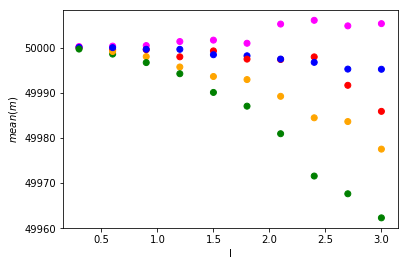

In [4]:
plt.scatter(lvals,m_means,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$mean(m)$')

Text(0,0.5,'$std(m)$')

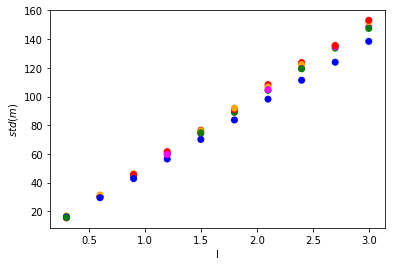

In [5]:
plt.scatter(lvals,m_devs,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$std(m)$')

Text(0,0.5,'$mean(n)$')

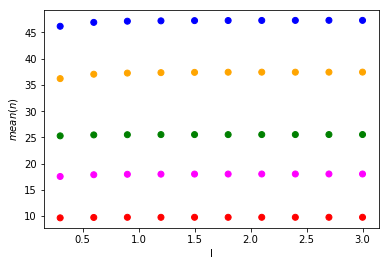

In [6]:
plt.scatter(lvals,n_means,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$mean(n)$')

Text(0,0.5,'$std(n)$')

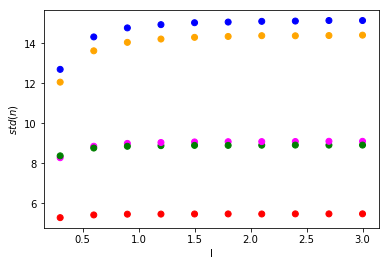

In [7]:
plt.scatter(lvals,n_devs,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$std(n)$')

(1e-05, 1000000.0)

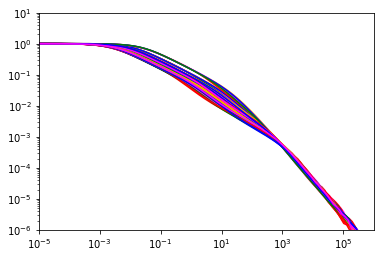

In [8]:
for d in data:
    t,cdf = d['rt_cdf'].T
    l = d['l']
    E = d['E']
    plt.loglog(E*t*z1/l,cdf,color=colors[d['flow']])
plt.ylim(1e-6,10)
plt.xlim(1e-5,1e6)

Text(0,0.5,'$deviation between mean(n) ancey and me$')

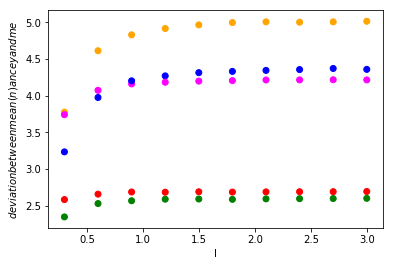

In [9]:
# now look at deviations from ancey n statistics
meanshift = np.array(n_means)-np.array(n_means_anc)
plt.scatter(lvals,meanshift,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$deviation between mean(n) ancey and me$')

Text(0,0.5,'$deviation between var(n) ancey and me$')

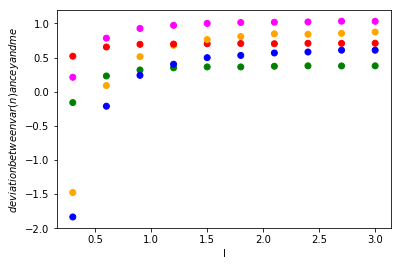

In [10]:
# now look at deviations from ancey n statistics
varshift = np.array(n_devs)-np.array(n_devs_anc)
plt.scatter(lvals,varshift,color = [colors[flow] for flow in flows])
plt.xlabel('l')
plt.ylabel('$deviation between var(n) ancey and me$')

# now make the publication figures

In [ ]:
from matplotlib import rcParams
rcParams['axes.labelsize'] = 20
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 16
from matplotlib import rcParams
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = True
rcParams['figure.figsize'] = 6,5
rcParams.update({'font.size': 22})
rcParams['lines.linewidth']=3
rcParams['lines.markersize']=5

In [ ]:
# panel (a) 
dats = sorted([d for d in data if d['l']==a and d['flow']!='l'],key=lambda x: x['flow'])
for d in dats:
    t,cdf = d['rt_cdf'].T
    t = t/3600
    plt.loglog(t,cdf,color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
plt.xlim(1e-7,1e3)
plt.ylim(1e-6,1e2)
plt.legend()
#plt.xlabel('Resting time $T$ [hours]')
plt.ylabel('Non-exceedance probability')

textstr = '(a)'
props = dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=0.5)
ax = plt.gca()
ax.text(0.07, 0.95, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)

plt.savefig('../jgr/figures/1.pdf',bbox_inches='tight',dpi=600)

In [ ]:
# panel (b) 
dats = sorted([d for d in data if d['l']==a and d['flow']!='l'],key=lambda x:x['flow'])
for d in dats:
    t,cdf = d['rt_cdf'].T
    t = t
    E = d['E']
    l = d['l']
    plt.loglog(t*E/l*z1,cdf,color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
plt.xlim(1e-4,1e8)
plt.ylim(1e-6,1e2)
plt.legend()
#plt.xlabel('Scaled resting time $T/T_0$ [unitless]')
#plt.ylabel('Non-exceedance probability')

textstr = '(b)'
props = dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=0.5)
ax = plt.gca()
ax.text(0.07, 0.95, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)

plt.savefig('../jgr/figures/2.pdf',bbox_inches='tight',dpi=600)

In [ ]:
# panel c 
incl = [1.0,2.0,5.0,10.0]
dats = sorted([d for d in data if d['flow']=='g' and round(d['l']/a,1) in incl],key=lambda x:x['l'])
lines = ['-','--','-.',':']
i=0
for d in dats:
    t,cdf = d['rt_cdf'].T
    t = t/3600
    E = d['E']
    l = d['l']
    plt.loglog(t,cdf,linestyle=lines[i],color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
    i+=1
plt.xlim(1e-7,1e3)
plt.ylim(1e-6,1e2)
plt.legend()
plt.xlabel('Resting time $T$')
plt.ylabel('Non-exceedance probability')

textstr = '(c)'
props = dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=0.5)
ax = plt.gca()
ax.text(0.07, 0.95, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)


plt.savefig('../jgr/figures/3.pdf',bbox_inches='tight',dpi=600)

In [ ]:
# panel d 
incl = [1.0,2.0,5.0,10.0]
dats = sorted([d for d in data if d['flow']=='g' and round(d['l']/a,1) in incl],key=lambda x:x['l'])
lines = ['-','--','-.',':']
i=0
for d in dats:
    t,cdf = d['rt_cdf'].T
    t = t
    E = d['E']
    l = d['l']
    plt.loglog(t*E/l*z1,cdf,linestyle=lines[i],color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
    i+=1
plt.xlim(1e-4,1e8)
plt.ylim(1e-6,1e2)
plt.legend()
plt.xlabel('Scaled resting time $T/T_0$ [unitless]')
#plt.ylabel('Non-exceedance probability')

textstr = '(d)'
props = dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=0.5)
ax = plt.gca()
ax.text(0.07, 0.95, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)



plt.savefig('../jgr/figures/4.pdf',bbox_inches='tight',dpi=600)

In [7]:
from scipy import optimize
from scipy.special import gamma, factorial
def nbin(k,r,p):
    return gamma(k+r)/gamma(r)/factorial(k)*p**r*(1-p)**k

# now make the particle activity figure 
dats = sorted([x for x in data if round(x['l']/a,1)==1.0],key = lambda x: x['flow'])
i = 0 
for d in dats:
    n,pn = d['n_pdf'].T
    if i==0:
        lam = 5.45+6.59 # sum of lambdas 
        mu = 3.74
        alph = 4.64 + 0.77# sig + nu 
        ds = 1
    elif i==1:
        lam = 7.74 + 8.42
        mu = 4.34
        alph = 4.95 + 0.56
        ds = 2
    elif i==2:
        lam = 15.56 + 22.07
        mu = 3.56
        alph = 4.52 + 0.68   
        ds = 2
    elif i==3:
        lam = 15.52 + 14.64
        mu = 4.32
        alph = 4.77 + 0.48
        ds = 3
    elif i==4:
        lam = 15.45 + 24.49
        mu = 3.64
        alph = 4.21 + 0.36
        ds = 3
    plt.scatter(n[::ds],pn[::ds],color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)))
    popt, _ = optimize.curve_fit(nbin, n, pn,p0=[lam/mu,1-mu/alph])
    
    if i!=4:
        plt.plot(n, nbin(n, *popt),color='grey',lw=2,zorder=-1)
        if i==0:
            POPT = np.copy(popt)
    if i==4:
        plt.plot(n, nbin(n, *popt),color='grey',lw=2,zorder=-1,label='NegBin fit')

    i += 1
plt.xlim(-2,80)
plt.ylim(0,0.12)
plt.xlabel('Particle activity $n$')
plt.ylabel('Probability distribution')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,4,5,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],borderpad=0.25,handlelength=1.0)

textstr = '(a)'
props = dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=0.5)
ax = plt.gca()
ax.text(0.07, 0.95, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)

plt.savefig('../jgr/figures/activity.pdf',bbox_inches='tight',dpi=600)

NameError: name 'data' is not defined

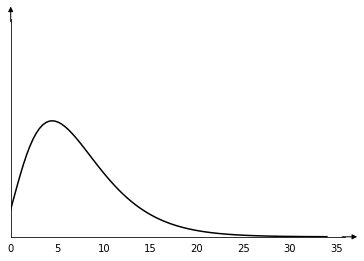

In [8]:
lam = 5.45+6.59 # sum of lambdas 
mu = 3.74
alph = 4.64 + 0.77# sig + nu 
r,p = lam/mu,1-mu/alph
n = np.linspace(0,34,100)
plt.plot(n,nbin(n,r,p), color='black')
#plt.ylabel('$p(n)$',fontsize=35,rotation=0)
#plt.xlabel('$n$')
plt.xlim(0,36)
plt.ylim(0,0.18)
plt.tick_params(axis='both', which='both', bottom=False, left=False,labelleft=False)
#plt.xticks([-0.5,31],['0','$n$'])
ax = plt.gca()
#ax.tick_params(axis='x', which='major', labelsize=35)
ax.annotate('', xy=(0,0.99), xycoords='axes fraction', xytext=(0,15), 
            textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0, 
                           facecolor='black'))
ax.annotate('', xy=(0.99,0), xycoords='axes fraction', xytext=(15,0), 
            textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0, 
                           facecolor='black'))
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth=8
ax.spines['bottom'].set_linewidth=8
#yaxis.set_label_coords(-0.1,1.02)

ax.spines['top'].set_visible(False)
ax.yaxis.set_label_coords(-0.1,0.8)
plt.savefig('../jgr/figures/negbin.png',bbox_inches='tight',dpi=600,pad_inches=0)

In [9]:
from scipy import optimize

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)


rcParams['lines.markersize']=6

dats = sorted([x for x in data if round(x['l']/a,1) in [1.0,2.0,5.0] and x['flow']=='i'],key = lambda x: x['l'])
i=0
for d in dats:
    m,pm = d['m_pdf'].T
    m = m-(m*pm).sum()
    m = z1*m/a
    if i==0:
        ds = 1
        marker = '^'
    elif i==1:
        ds = 10
        marker = 'o'
    elif i==2:
        ds = 10
        marker = 'v'
    plt.scatter(m[::ds],pm[::ds],color=d['color'],label='flow ${}$, $l={}a$'.format(d['flow'],round(d['l']/a,1)),marker=marker)
    
    mean = (m*pm).sum()
    std = np.sqrt(((m-mean)**2*pm).sum())
    popt, _ = optimize.curve_fit(gaussian, m, pm, p0 = [pm.max(),mean,std])
    if i!=2:
        plt.plot(m, gaussian(m, *popt),color='grey',lw=2,zorder=-1)
    if i==2:
        plt.plot(m, gaussian(m, *popt),color='grey',lw=2,zorder=-1,label='Gaussian fit')

    
    i+=1
plt.xlim(-10,10)
plt.ylim(0,0.03)
plt.xlabel('Bed elevation $z_1 m$ [units of $a$]')
plt.ylabel('Probability distribution')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,3,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],borderpad=0.25,handlelength=1.0)
rcParams['lines.markersize']=5



textstr = '(b)'
props = dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=0.5)
ax = plt.gca()
ax.text(0.07, 0.95, textstr, transform=ax.transAxes, fontsize=30,
        verticalalignment='top', bbox=props)




plt.savefig('../jgr/figures/ele.pdf',bbox_inches='tight',dpi=600)
#plt.legend(borderpad=0,handlelength=1.0)

NameError: name 'rcParams' is not defined

TypeError: object of type 'NoneType' has no len()

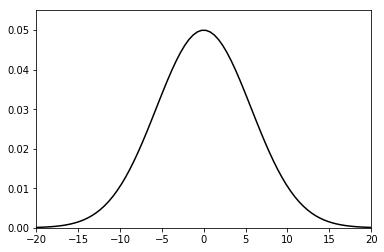

In [18]:
m = np.linspace(-25,25,100)
plt.plot(m,gaussian(m,0.05,0,2), color='black')
#plt.ylabel('$p(m)$',fontsize=35)
plt.xlim(-20,20)
plt.ylim(0,0.055)
plt.tick_params(axis=None, which='both', bottom=False, left=False,labelleft=False)
plt.xticks(None)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=35)

ax.annotate('', xy=(0.99,0), xycoords='axes fraction', xytext=(15,0), 
            textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0, 
                           facecolor='black'))
ax.annotate('', xy=(0.5,0.99), xycoords='axes fraction', xytext=(0,15), 
            textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0, 
                           facecolor='black'))
ax.annotate('', xy=(0.01,0), xycoords='axes fraction', xytext=(-15,0), 
            textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle='<|-', shrinkA=0, shrinkB=0, 
                           facecolor='black'))
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position('center')

ax.spines['left'].set_linewidth=8
ax.spines['bottom'].set_linewidth=8
ax.spines['top'].set_visible(False)
ax.yaxis.set_label_coords(0.48,0.25)
plt.savefig('../jgr/figures/gauss.png',bbox_inches='tight',dpi=600,pad_inches=0)

In [199]:
# make a fake joint distribution
dats = [d for d in data if d['flow']=='a' and round(d['l']/a,1)==1.0][0]

In [227]:
m,pm = dats['m_pdf'].T
mmean = (m*pm).sum()
std = np.sqrt(((m-mean)**2*pm).sum())
mvals, _ = optimize.curve_fit(gaussian, m-mmean, pm, p0 = [pm.max(),0,std]1.52)
n,pn = dats['n_pdf'].T
lam = 5.45+6.59 # sum of lambdas 
mu = 3.74
alph = 4.64 + 0.77# sig + nu 
nvals, _ = optimize.curve_fit(nbin, n, pn,p0=[lam/mu,1-mu/alph])
def dist(n,m):
    return gaussian(m,*mvals)*nbin(n,*nvals)
n.max()

64.0

In [307]:
# get the real pdf
pdf = np.load('../data/jointpdf.npy')

In [308]:
x,y,z = pdf

In [314]:
(z==0).sum()/z.size*100

24.691358024691358

In [318]:
from scipy.interpolate import SmoothBivariateSpline

# play around with the s= parameter to control the degree of smoothing
spl = SmoothBivariateSpline(x, y, z)

# coordinates to evaluate the spline fit at
xmin,xmax,nx = x.min(),y.min(),1000
ymin,ymax,ny = y.min(),y.max(),1000
xeval = np.linspace(xmin, xmax, nx)
yeval = np.linspace(ymin, ymax, ny)

# evaluate the spline fit
H = spl(xeval, yeval, grid=True)

/home/kpierce/anaconda3/lib/python3.6/site-packages/scipy/interpolate/fitpack2.py:1051: UserWarning: ier=356
  warnings.warn(message)


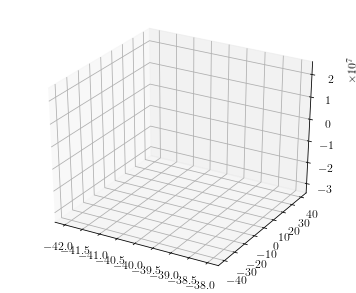

In [320]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xe, ye = np.ix_(xeval, yeval)

ax.plot_surface(xe,ye,H)
#fig.colorbar(c, ax=ax)


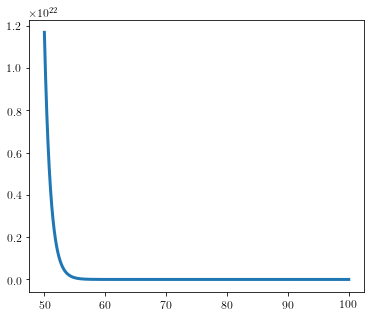

In [407]:
tauk = np.random.exponential(scale=1,size=150).cumsum()
tauk = tauk[tauk<100.0]
t = np.linspace(50,100,500)
def comb(t):
    return sum([np.exp(-(t-tk)) for tk in tauk])
plt.plot(t,comb(t))

In [402]:
tauk

array([  2.29241161,   2.46166905,   2.84618536,   5.3086265 ,
         5.50487188,   6.7526978 ,   7.77608252,  11.33245237,
        11.40213283,  13.23033044,  18.04164251,  20.48927281,
        21.25751373,  21.96361732,  22.31798764,  22.43670162,
        23.93745322,  24.78498203,  25.20640314,  25.52995587,
        26.55207698,  27.74207298,  27.92083244,  28.20651199,
        28.52883399,  29.26582208,  31.80957309,  32.69543621,
        34.55921848,  35.96251582,  36.26492751,  36.3280181 ,
        37.96098379,  38.29790544,  38.55314526,  39.16826708,
        43.48594319,  44.15040743,  44.19204254,  46.51331979,
        46.96208943,  46.97848953,  48.16553455,  48.99105124,
        49.69852936,  52.14334971,  53.23935613,  54.42210976,
        55.05547406,  55.68324775,  59.20918306,  59.94776203,
        60.37305497,  60.91436696,  62.13558338,  62.35940426,
        65.2777455 ,  70.95183367,  70.96489427,  71.05067765,
        71.33252611,  71.54271318,  71.93450892,  73.25